In [4]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt
from citipy import citipy
from api_keyz import (yeehaw)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
citiespd = pd.DataFrame(cities,columns=['City'])
citiespd["Latitude"] = ""
citiespd["Longitude"] = ""
citiespd["Humidity"] = ""
citiespd["Cloudiness"] = ""
citiespd["Max Temperature"] = ""
citiespd["Wind Speed"] = ""
citiespd["Country"] = ""
citiespd["Date"] = ""
citiespd.head()

739


,City,Latitude,Longitude,Humidity,Cloudiness,Max Temperature,Wind Speed,Country,Date
0,rikitea,,,,,,,,
1,pacific grove,,,,,,,,
2,cam ranh,,,,,,,,
3,mys shmidta,,,,,,,,
4,port elizabeth,,,,,,,,


### Perform API Calls
###### Weather check on each city using a series of successive API calls.
###### Includes a print log of each city as it's being processed.

In [6]:
url="http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in citiespd.iterrows():
    city=row['City']
    weather_url = f"{url}q={city}&appid={yeehaw}"
    weatherz = weather_url.replace(' ','')
    weather = requests.get(weatherz).json()
    try:     
        print(f"Processing Record {index} | {city}")
        citiespd.loc[index, "Latitude"] = weather["coord"]["lat"]
        citiespd.loc[index, "Longitude"] = weather["coord"]["lon"]
        citiespd.loc[index, "Humidity"] = weather["main"]["humidity"]
        citiespd.loc[index, "Cloudiness"] = weather["clouds"]["all"]
        citiespd.loc[index, "Max Temperature"] = weather["main"]["temp_max"]
        citiespd.loc[index, "Wind Speed"] = weather["wind"]["speed"]
        citiespd.loc[index, "Country"] = weather["sys"]["country"]
        citiespd.loc[index, "Date"] = weather["dt"]
    except (KeyError, IndexError): 
        print("{city} not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | rikitea
Processing Record 1 | pacific grove
{city} not found. Skipping...
Processing Record 2 | cam ranh
{city} not found. Skipping...
Processing Record 3 | mys shmidta
{city} not found. Skipping...
Processing Record 4 | port elizabeth
{city} not found. Skipping...
Processing Record 5 | albany
Processing Record 6 | palmer
Processing Record 7 | vaini
Processing Record 8 | erzin
Processing Record 9 | anloga
Processing Record 10 | beringovskiy
Processing Record 11 | takoradi
Processing Record 12 | busselton
Processing Record 13 | krabi
Processing Record 14 | cocorit
Processing Record 15 | bluff
Processing Record 16 | roslavl
Processing Record 17 | cape town
{city} not found. Skipping...
Processing Record 18 | basco
Processing Record 19 | norman wells
{city} not found. Skipping...
Processing Record 20 | tasiilaq
Processing Record 21 | pevek
Processing Record 22 | mar del plata
{city} not found. Skipping...
Process

Processing Record 196 | bijie
Processing Record 197 | grindavik
Processing Record 198 | yurty
Processing Record 199 | warqla
{city} not found. Skipping...
Processing Record 200 | mahebourg
Processing Record 201 | nabire
Processing Record 202 | mogadishu
Processing Record 203 | baijiantan
Processing Record 204 | bandar-e lengeh
{city} not found. Skipping...
Processing Record 205 | verdalsora
{city} not found. Skipping...
Processing Record 206 | ostrovnoy
Processing Record 207 | manta
Processing Record 208 | deputatskiy
Processing Record 209 | zabol
Processing Record 210 | gambela
Processing Record 211 | torbay
Processing Record 212 | pundaguitan
Processing Record 213 | skjervoy
Processing Record 214 | zaoyang
Processing Record 215 | amderma
{city} not found. Skipping...
Processing Record 216 | kavieng
Processing Record 217 | margate
Processing Record 218 | araouane
Processing Record 219 | barentsburg
{city} not found. Skipping...
Processing Record 220 | leninskoye
Processing Record 221 

Processing Record 397 | ventspils
Processing Record 398 | lorengau
Processing Record 399 | airai
Processing Record 400 | roald
Processing Record 401 | kansanshi
Processing Record 402 | santo amaro da imperatriz
{city} not found. Skipping...
Processing Record 403 | marsa matruh
{city} not found. Skipping...
Processing Record 404 | finschhafen
Processing Record 405 | meyungs
{city} not found. Skipping...
Processing Record 406 | leh
Processing Record 407 | ngunguru
Processing Record 408 | coos bay
{city} not found. Skipping...
Processing Record 409 | abu samrah
{city} not found. Skipping...
Processing Record 410 | coihaique
Processing Record 411 | menongue
Processing Record 412 | fredericksburg
Processing Record 413 | cathedral city
{city} not found. Skipping...
Processing Record 414 | tome
Processing Record 415 | oktyabrskiy
Processing Record 416 | point pedro
{city} not found. Skipping...
Processing Record 417 | la ronge
{city} not found. Skipping...
Processing Record 418 | iralaya
Proc

Processing Record 604 | olenino
Processing Record 605 | tuktoyaktuk
Processing Record 606 | pipri
Processing Record 607 | bartica
Processing Record 608 | forestville
Processing Record 609 | aksarka
Processing Record 610 | nemuro
Processing Record 611 | karatuzskoye
Processing Record 612 | dubai
Processing Record 613 | lata
Processing Record 614 | san andres
{city} not found. Skipping...
Processing Record 615 | pasco
Processing Record 616 | keetmanshoop
Processing Record 617 | garden city
{city} not found. Skipping...
Processing Record 618 | marevo
Processing Record 619 | champerico
Processing Record 620 | sohag
Processing Record 621 | santiago del estero
{city} not found. Skipping...
Processing Record 622 | kawalu
Processing Record 623 | jinchang
Processing Record 624 | cam pha
{city} not found. Skipping...
Processing Record 625 | ahipara
Processing Record 626 | kazalinsk
{city} not found. Skipping...
Processing Record 627 | surt
Processing Record 628 | zhicheng
Processing Record 629 |

In [7]:
citiespd.replace('', np.nan, inplace=True)
citiespd.dropna(inplace=True)
citiespd.to_csv("cityweather.csv", encoding="utf-8", index=False)
citiespd.describe()

,Latitude,Longitude,Humidity,Cloudiness,Max Temperature,Wind Speed,Date
count,561.000000,561.000000,561.00000,561.000000,561.000000,561.000000,5.610000e+02
mean,23.693633,20.851174,65.71836,57.160428,290.793298,3.637968,1.620307e+09
std,31.830818,86.062364,23.72700,38.489042,11.169656,2.329147,7.870361e+01
min,-54.800000,-175.200000,3.00000,0.000000,258.770000,0.040000,1.620307e+09
25%,-1.195000,-53.461600,49.00000,20.000000,283.150000,1.810000,1.620307e+09
50%,29.957600,24.666700,70.00000,75.000000,292.150000,3.090000,1.620307e+09
75%,49.683500,86.146900,86.00000,96.000000,299.950000,5.140000,1.620307e+09
max,78.218600,179.316700,100.00000,100.000000,317.150000,11.830000,1.620307e+09


### Plotting the Data
##### Labeling of the plots using plot titles (including date of analysis) and axes labels.

#### Latitude vs Max Temperature Plot

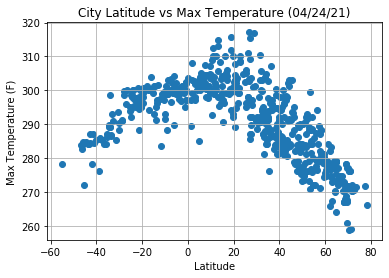

In [23]:
plt.scatter(citiespd["Latitude"], citiespd["Max Temperature"], marker="o")
plt.title("City Latitude vs Max Temperature (04/24/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperatureInWorldCities.png")

#### Latitude vs. Humidity Plot

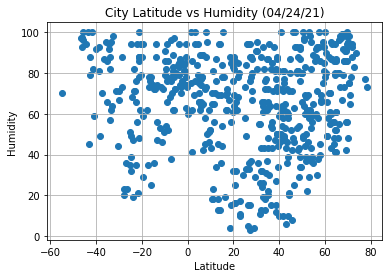

In [22]:
plt.scatter(citiespd["Latitude"], citiespd["Humidity"], marker="o")
plt.title("City Latitude vs Humidity (04/24/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("HumidityInWorldCities.png")

#### Latitude vs. Cloudiness Plot

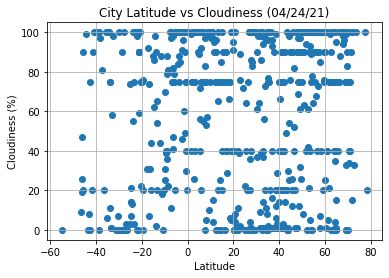

In [21]:
plt.scatter(citiespd["Latitude"], citiespd["Cloudiness"], marker="o")
plt.title("City Latitude vs Cloudiness (04/24/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("CloudinessInWorldCities.png")

#### Latitude vs. Wind Speed Plot

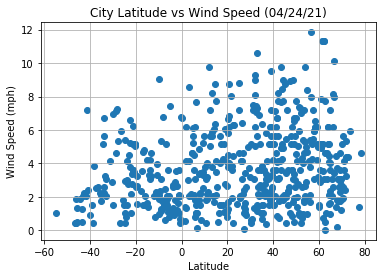

In [24]:
plt.scatter(citiespd["Latitude"], citiespd["Wind Speed"], marker="o")
plt.title("City Latitude vs Wind Speed (04/24/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeedInWorldCities.png")

### Linear Regression

In [12]:
north = citiespd.query('Latitude >= 0')
south = citiespd.query('Latitude < 0')
south.head()

,City,Latitude,Longitude,Humidity,Cloudiness,Max Temperature,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,71.0,100.0,297.85,4.48,PF,1.620307e+09
7,vaini,-21.2000,-175.2000,100.0,90.0,296.15,5.14,TO,1.620307e+09
12,busselton,-33.6500,115.3333,95.0,1.0,286.48,3.25,AU,1.620307e+09
15,bluff,-46.6000,168.3333,97.0,9.0,283.71,0.45,NZ,1.620307e+09
24,pangai,-19.8000,-174.3500,88.0,75.0,298.15,2.57,TO,1.620307e+09


#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

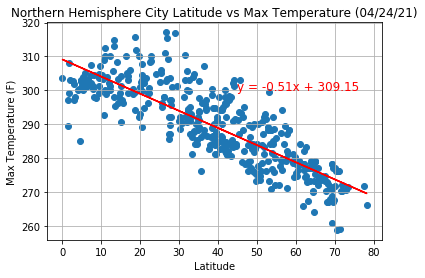

The r-value is: -0.8365


In [13]:
plt.scatter(north["Latitude"], north["Max Temperature"], marker="o")
plt.title("Northern Hemisphere City Latitude vs Max Temperature (04/24/21)")
plt.grid(True)
x_values=north["Latitude"]
y_values=north["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(45,300),fontsize=12,color="red")
plt.show()
print(f"The r-value is: {round(rvalue,4)}")

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

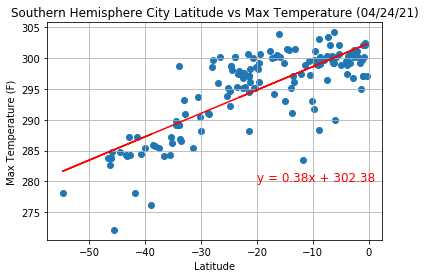

The r-value is: 0.7905


In [14]:
plt.scatter(south["Latitude"], south["Max Temperature"], marker="o")
plt.title("Southern Hemisphere City Latitude vs Max Temperature (04/24/21)")
plt.grid(True)
x_values=south["Latitude"]
y_values=south["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-20,280),fontsize=12,color="red")
plt.show()
print(f"The r-value is: {round(rvalue,4)}")

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

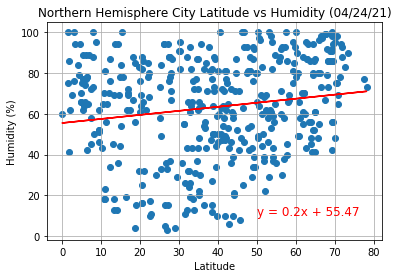

The r-value is: 0.1617


In [15]:
plt.scatter(north["Latitude"], north["Humidity"], marker="o")
plt.title("Northern Hemisphere City Latitude vs Humidity (04/24/21)")
plt.grid(True)
x_values=north["Latitude"]
y_values=north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(50,10),fontsize=12,color="red")
plt.show()
print(f"The r-value is: {round(rvalue,4)}")

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

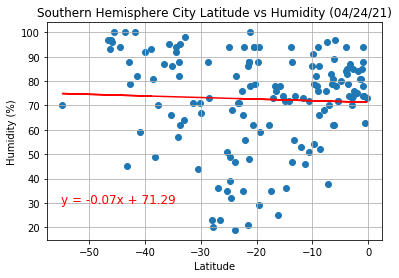

The r-value is: -0.0449


In [16]:
plt.scatter(south["Latitude"], south["Humidity"], marker="o")
plt.title("Southern Hemisphere City Latitude vs Humidity (04/24/21)")
plt.grid(True)
x_values=south["Latitude"]
y_values=south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")
plt.show()
print(f"The r-value is: {round(rvalue,4)}")

#### Northern Hemisphere - Cloudiness (%) vs. Latitude

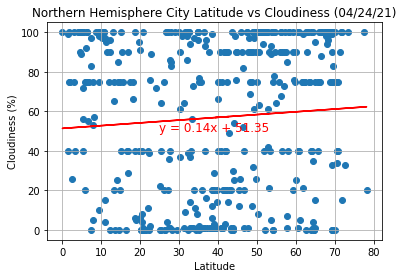

The r-value is: 0.0716


In [17]:
plt.scatter(north["Latitude"], north["Cloudiness"], marker="o")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (04/24/21)")
plt.grid(True)
x_values=north["Latitude"]
y_values=north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(25,50),fontsize=12,color="red")
plt.show()
print(f"The r-value is: {round(rvalue,4)}")

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

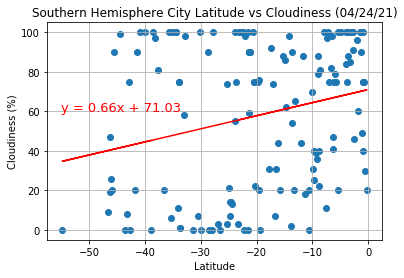

The r-value is: 0.2432


In [18]:
plt.scatter(south["Latitude"], south["Cloudiness"], marker="o")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (04/24/21)")
plt.grid(True)
x_values=south["Latitude"]
y_values=south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,60),fontsize=13,color="red")
plt.show()
print(f"The r-value is: {round(rvalue,4)}")

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

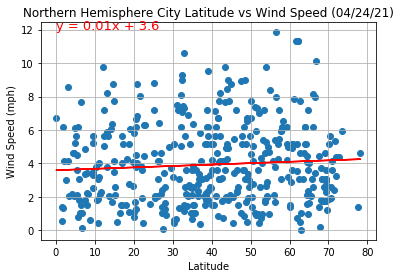

The r-value is: 0.0692


In [19]:
plt.scatter(north["Latitude"], north["Wind Speed"], marker="o")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (04/24/21)")
plt.grid(True)
x_values=north["Latitude"]
y_values=north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(0,12),fontsize=13,color="red")
plt.show()
print(f"The r-value is: {round(rvalue,4)}")

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

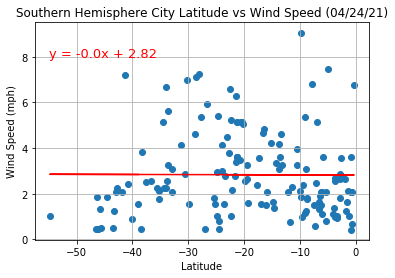

The r-value is: -0.0041


In [20]:
plt.scatter(south["Latitude"], south["Wind Speed"], marker="o")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (04/24/21)")
plt.grid(True)
x_values=south["Latitude"]
y_values=south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,8),fontsize=13,color="red")
plt.show()
print(f"The r-value is: {round(rvalue,4)}")